In [1]:
%matplotlib notebook

import MDAnalysis as mda
import pyrexMD.misc as misc
import pyrexMD.core as core
import pyrexMD.topology as top
import pyrexMD.analysis.analysis as ana
import pyrexMD.analysis.contacts as con


from tqdm.notebook import tqdm
misc.apply_matplotlib_rc_settings()

In [2]:
ref1 = "./files/folding/1vii_ref.pdb"
ref2= "./files/folding/1vii_unfolded_frame.pdb"
tpr = "./files/folding/traj_protein.tpr"
xtc = "./files/folding/traj_protein.xtc"

In [3]:
folded = mda.Universe(ref1)
unfolded = mda.Universe(ref2)
mobile = mda.Universe(tpr, xtc)

top.norm_universe([folded, unfolded, mobile], verbose=False)

In [4]:
FRAME, TIME, RMSD = ana.get_RMSD(mobile, ref=folded, sel1="protein", sel2="protein")

  0%|          | 0/2001 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


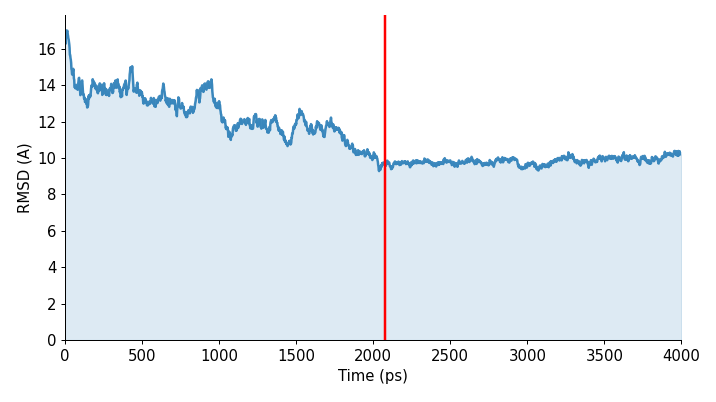

In [5]:
IP = core.iPlot(mobile, xdata=TIME, ydata=RMSD, ylabel="RMSD (A)")
IP()

In [ ]:
# in this demo we will use native contacts as bias contacts but usually you would use predicted contacts
NC, NC_d = con.get_Native_Contacts(folded)
_ = con.get_QBias(mobile, bc=NC, d_cutoff=10.0, warn=False)

In [ ]:
NC, NC_d = con.get_Native_Contacts(unfolded, sel="protein", save_as="files/folding/unfolded_contacts.txt")
fig, ax = con.plot_Contact_Map(folded, DCA_fin="files/folding/unfolded_contacts.txt", sel="protein", figsize=(7,7))

In [ ]:
NC, NC_dist, DM = con.get_NC_distances(folded, folded)
fig, ax = con.plot_Contact_Map_Distances(folded, NC=NC, NC_dist=NC_dist, sel="protein",figsize=(7,7))